### Аналитическое решение

In [57]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline


In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [59]:
plt.style.use('seaborn-v0_8')

In [60]:
column_names = ['CRIM', 'ZM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Пропуски необходимо заполнить. Категориальные признакие необходимо закодировать.

In [62]:
boston_data.describe()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Визуализация матрицы корреляции<br>
Анализируем связь факторов с целевым признаком 'MEDV'

Text(0, 0.5, 'Corr coeff')

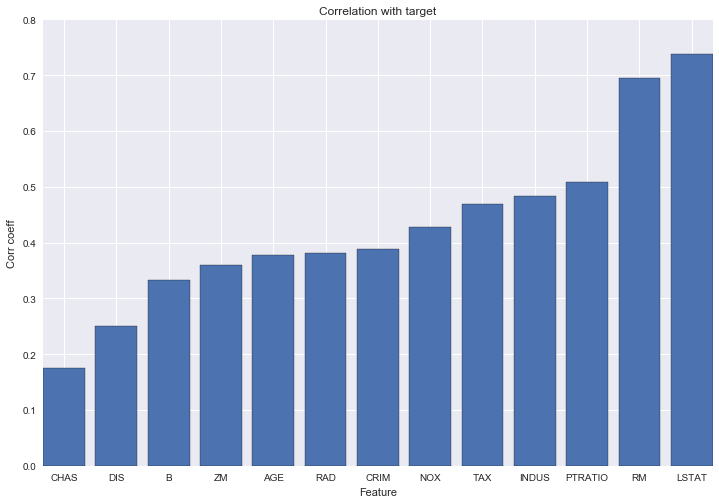

In [63]:
# Вычисляем модуль корреляции с целевой переменной
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
# Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')

# Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(12, 8)) # строим фигуру и координтаную плоскость
ax.bar(corr_with_target.index, corr_with_target.values) # строим столбчатую диаграмму и определяем источник данных
ax.set_title('Correlation with target') # титл - название графика
ax.set_xlabel('Feature') # ось х "свойства", признаки
ax.set_ylabel('Corr coeff') # ось y "коэффициаент корреляции"

Самый скоррелированный с ['MEDV'] является признак ['LSTAT'] - процент насления с низким статусом.
<br>Построим линейную регрессию, используя этот признак
<br>Строим линейную регрессию = обучаем линейную регрессию = находим её параметры

In [90]:
X = boston_data[['LSTAT']] # матрица наблюдений, двойнфе скобки говорят, что это уже матрица, а не просто вектор как в след строке
y = boston_data['MEDV'] # вектор правильных ответов
#X.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [91]:
# Функция линейной регрессии
def linear_regression (X, y):
    
    # создаём единичный вектор
    ones = np.ones(X.shape[0])
    
    # добавляем вектор к таблице первым столбом
    X = np.column_stack([ones, X])
    
    # вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    
    # вычисляем вектор коеффициентов
    w = Q @ X.T @ y
    
    return w

In [102]:
# Вычисляем параметры линейной регрессии
w = linear_regression(X, y)

# Выводим вычислинные значения парамтров в виде вектора
print(f'Vector w: {w}')

# Выводим вычисленные параметры с округлением до двух знаков после запятой
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')
print('Модель будет иметь вид Y = 34.55 - 0.95*X1')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95
Модель будет иметь вид Y = 34.55 - 0.95*X1
